### Задача 1
Руководство компании обратило внимание на то, что сотрудники старше 35 лет болеют чаще, чем более молодые сотрудники. Кроме этого, среди мужчин количество пропусков рабочих дней в связи с больничным выше, чем среди женщин. В связи с этой ситуацией, руководство организации планирует ввести дополнительные медицинские осмотры среди групп риска. 
Вам необходимо обосновать, что:
    1) Мужчины пропускают в течение года более 2 рабочих дней по болезни значимо чаще женщин.
    2) Работники старше 35 лет пропускают в течение года более 2 рабочих дней по болезни значимо чаще своих более молодых коллег.
Все необходимые данные содержатся в файле «Статистика за 2016 год».

### Решение
Для решения данной задачи необходимо:
1. Провести анализ данных.
2. Протестировать значимость двух гипотез.
3. Сделать выводы.

В первую очередь необходимо загрузить набор данных и познакомиться с данными. Набор данных представляет собой текстовый файл в формате csv с разделителями с виде запятой (',') и кодировкой Windows-1251.

##### Исходный файл "Статистика за 2016 год.csv" переименован в "Stats_2016.csv" для совместимости.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from statistics import mean, median
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
%matplotlib inline

df = pd.read_csv('Stats_2016.csv', sep=',', encoding='cp1251')

#### Общая информация
1. В наборе данных содержится 237 строк и 3 столбца.
2. Пропущенные значения отсутствуют.

In [2]:
print('Первые несколько строк набора данных')
print(df.head(5))

Первые несколько строк набора данных
   Количество больничных дней  Возраст Пол
0                           5       39   Ж
1                           4       54   М
2                           4       26   М
3                           5       42   М
4                           4       29   М


In [3]:
print('Информация о данных')
print(df.describe(include='all'))

Информация о данных
        Количество больничных дней     Возраст  Пол
count                   237.000000  237.000000  237
unique                         NaN         NaN    2
top                            NaN         NaN    М
freq                           NaN         NaN  139
mean                      3.257384   40.181435  NaN
std                       1.807821    6.875157  NaN
min                       0.000000   23.000000  NaN
25%                       2.000000   36.000000  NaN
50%                       3.000000   41.000000  NaN
75%                       4.000000   45.000000  NaN
max                       8.000000   60.000000  NaN


In [4]:
print('Пропуски в данных')
print(df.isnull().sum())

Пропуски в данных
Количество больничных дней    0
Возраст                       0
Пол                           0
dtype: int64


#### Пропуски в данных отсутствуют.

#### Информация о работниках

In [5]:
count_all = len(df)
count_man = len(df[df['Пол'] == 'М'])
count_woman = len(df[df['Пол'] == 'Ж'])
print('Количество мужчин и женщин: {}'.format(count_all))
print('Количество мужчин: {}'.format(count_man))
print('Доля мужчин: {0:.2f}'.format(count_man / count_all))
print('Количество женщин: {}'.format(count_woman))
print('Доля женщин: {0:.2f}'.format(count_woman / count_all))

Количество мужчин и женщин: 237
Количество мужчин: 139
Доля мужчин: 0.59
Количество женщин: 98
Доля женщин: 0.41


Text(0.5, 1.0, 'Количество мужчин и женщин в выборке')

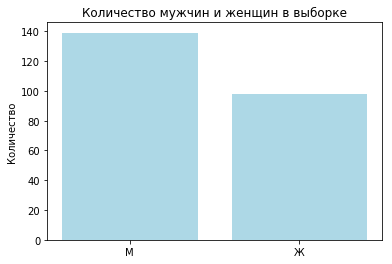

In [6]:
plt.figure(1)
height = [count_man, count_woman]
bars = ('М', 'Ж')
y_pos = np.arange(len(bars))
plt.bar(y_pos, height, color=('lightblue'), align='center')
plt.xticks(y_pos, bars)
plt.ylabel('Количество')
plt.title('Количество мужчин и женщин в выборке')

Text(0.5, 1.0, 'Гистограмма распределения работников по возрасту')

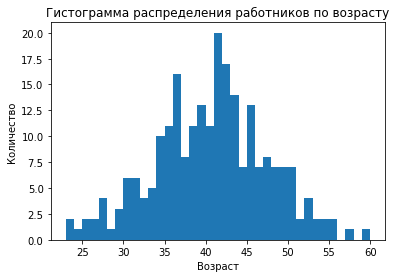

In [7]:
scope_age_all = max(df['Возраст']) - min(df['Возраст'])
plt.figure(2)
plt.hist(df['Возраст'], bins=scope_age_all)
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.title('Гистограмма распределения работников по возрасту')

Text(0.5, 1.0, 'Гистограмма распределения мужчин по возрасту')

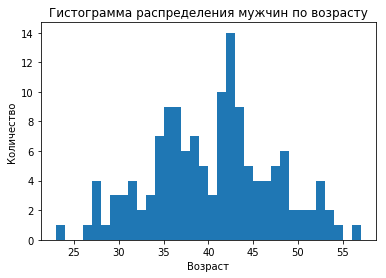

In [8]:
scope_age_man = max(df['Возраст'].loc[(df['Пол'] == 'М')]) - min(df['Возраст'].loc[(df['Пол'] == 'М')])
plt.figure(3)
plt.hist(df['Возраст'].loc[(df['Пол'] == 'М')], bins=scope_age_man)
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.title('Гистограмма распределения мужчин по возрасту')

Text(0.5, 1.0, 'Гистограмма распределения женщин по возрасту')

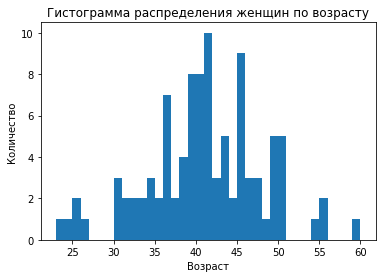

In [9]:
scope_age_woman = max(df['Возраст'].loc[(df['Пол'] == 'Ж')]) - min(df['Возраст'].loc[(df['Пол'] == 'Ж')])
plt.figure(4)
plt.hist(df['Возраст'].loc[(df['Пол'] == 'Ж')], bins=scope_age_woman)
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.title('Гистограмма распределения женщин по возрасту')

Text(0.5, 1.0, 'Диаграмма размаха - возраст')

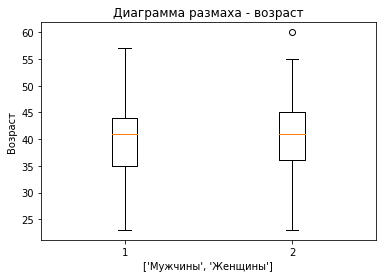

In [10]:
plt.figure(6)
data = [df['Возраст'].loc[df['Пол'] == 'М'],
        df['Возраст'].loc[df['Пол'] == 'Ж']]
plt.boxplot(data, showfliers=True)
plt.xlabel(['Мужчины', 'Женщины'])
plt.ylabel('Возраст')
plt.title('Диаграмма размаха - возраст')

#### Информация о количестве больничных дней

In [11]:
days_all_min = min(df['Количество больничных дней'])
days_all_max = max(df['Количество больничных дней'])
days_all_mean = mean(df['Количество больничных дней'])
days_all_med = median(df['Количество больничных дней'])

days_man_min = min(df['Количество больничных дней'].loc[(df['Пол'] == 'М')])
days_man_max = max(df['Количество больничных дней'].loc[(df['Пол'] == 'М')])
days_man_mean = mean(df['Количество больничных дней'].loc[(df['Пол'] == 'М')])
days_man_med = median(df['Количество больничных дней'].loc[(df['Пол'] == 'М')])

days_woman_min = min(df['Количество больничных дней'].loc[(df['Пол'] == 'Ж')])
days_woman_max = max(df['Количество больничных дней'].loc[(df['Пол'] == 'Ж')])
days_woman_mean = mean(df['Количество больничных дней'].loc[(df['Пол'] == 'Ж')])
days_woman_med = median(df['Количество больничных дней'].loc[(df['Пол'] == 'Ж')])

print('Минимальное значение количества больничных дней: {}'.format(days_all_min))
print('Максимальное значение количества больничных дней: {}'.format(days_all_max))
print('Среднее значение количества больничных дней: {0:.2f}'.format(days_all_mean))
print('Медиана количества больничных дней: {}'.format(days_all_med))
print('')
print('Минимальное значение количества больничных дней у мужчин: {}'.format(days_man_min))
print('Максимальное значение количества больничных дней у мужчин: {}'.format(days_man_max))
print('Среднее значение количества больничных дней у мужчин: {0:.2f}'.format(days_man_mean))
print('Медиана количества больничных дней у мужчин: {}'.format(days_man_med))
print('')
print('Минимальное значение количества больничных дней у женщин: {}'.format(days_woman_min))
print('Максимальное значение количества больничных дней у женщин: {}'.format(days_woman_max))
print('Среднее значение количества больничных дней у женщин: {0:.2f}'.format(days_woman_mean))
print('Медиана количества больничных дней у женщин: {}'.format(days_woman_med))

Минимальное значение количества больничных дней: 0
Максимальное значение количества больничных дней: 8
Среднее значение количества больничных дней: 3.26
Медиана количества больничных дней: 3

Минимальное значение количества больничных дней у мужчин: 0
Максимальное значение количества больничных дней у мужчин: 8
Среднее значение количества больничных дней у мужчин: 3.18
Медиана количества больничных дней у мужчин: 3

Минимальное значение количества больничных дней у женщин: 0
Максимальное значение количества больничных дней у женщин: 8
Среднее значение количества больничных дней у женщин: 3.37
Медиана количества больничных дней у женщин: 3.0


Text(0.5, 1.0, 'Диаграмма размаха - количество больничных дней')

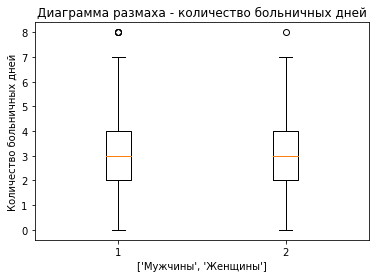

In [12]:
plt.figure(6)
data = [df['Количество больничных дней'].loc[df['Пол'] == 'М'],
        df['Количество больничных дней'].loc[df['Пол'] == 'Ж']]
plt.boxplot(data, showfliers=True)
plt.xlabel(['Мужчины', 'Женщины'])
plt.ylabel('Количество больничных дней')
plt.title('Диаграмма размаха - количество больничных дней')

#### Гистограмма распределения больничных дней

Text(0.5, 1.0, 'Гистограмма распределения больничных дней по всем работникам')

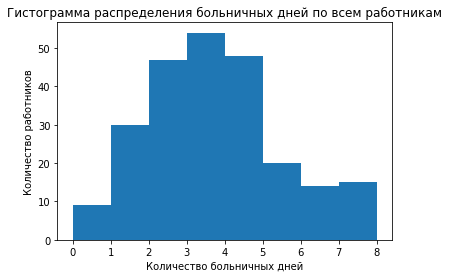

In [13]:
scope_days_all = max(df['Количество больничных дней']) - min(df['Количество больничных дней'])
plt.figure(6)
plt.hist(df['Количество больничных дней'], bins=scope_days_all)
plt.xlabel('Количество больничных дней')
plt.ylabel('Количество работников')
plt.title('Гистограмма распределения больничных дней по всем работникам')

Text(0.5, 1.0, 'Гистограмма распределения больничных дней по мужчинам')

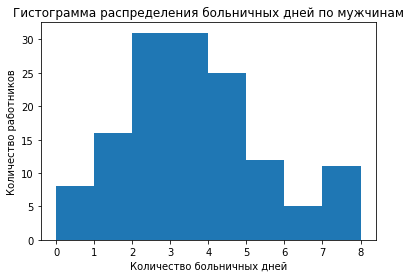

In [14]:
df_man = df[df['Пол'] == 'М']
scope_days_man = max(df_man['Количество больничных дней']) - min(df_man['Количество больничных дней'])
plt.figure(7)
plt.hist(df_man['Количество больничных дней'], bins=scope_days_man)
plt.xlabel('Количество больничных дней')
plt.ylabel('Количество работников')
plt.title('Гистограмма распределения больничных дней по мужчинам')

Text(0.5, 1.0, 'Гистограмма распределения больничных дней по женщинам')

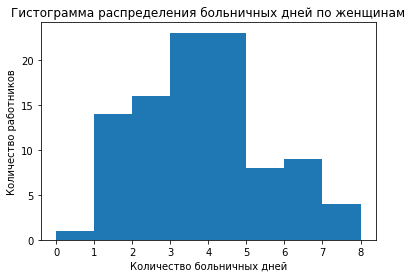

In [15]:
df_woman = df[df['Пол'] == 'Ж']
scope_days_woman = max(df_woman['Количество больничных дней']) - min(df_woman['Количество больничных дней'])
plt.figure(8)
plt.hist(df_woman['Количество больничных дней'], bins=scope_days_woman)
plt.xlabel('Количество больничных дней')
plt.ylabel('Количество работников')
plt.title('Гистограмма распределения больничных дней по женщинам')

### Проверка гипотез

#### Гипотеза 1. Мужчины пропускают в течение года более 2 рабочих дней по болезни значимо чаще женщин.

Для проверки этой гипотезы необходимо оценить, как часто работники пропускают в течение года более 2 рабочих дней по болезни.

Для этого добавим еще один столбец 'Больничный более 2 дней', в котором значения будут принимать:
1 - если работник пропустил в течение года более 2 рабочих дней по болезни,
0 - если работник пропустил в течение года 2 и менее рабочих дня по болезни.

In [16]:
df.loc[df['Количество больничных дней'] > 2, 'Больничный более 2 дней'] = 1
df.loc[df['Количество больничных дней'] <= 2, 'Больничный более 2 дней'] = 0

print(df.head(5))

   Количество больничных дней  Возраст Пол  Больничный более 2 дней
0                           5       39   Ж                      1.0
1                           4       54   М                      1.0
2                           4       26   М                      1.0
3                           5       42   М                      1.0
4                           4       29   М                      1.0


#### Для подтверждения гипотезы необходимо дать оценку статистической значимости. Проверку значимости предлагается проводить с помощью критерия согласия хи квадрат (или критерий согласия Пирсона) для двух независимых выборок

##### Принимаем две гипотезы:
##### H0 (нулевая гипотеза) - между полом и частотой пропуска более 2 дней по болезни связи нет
##### Ha (альтернативная гипотеза) - связь между полом и частотой существенна

##### Если значение p <= alpha, то нулевая гипотеза отклоняется
##### Если значение p > alpha, то нулевая гипотеза не может быть отклонена
##### Порог alpha определим равным 0.05

In [17]:
sum_man = sum(df['Больничный более 2 дней'].loc[df['Пол'] == 'М'])
print('Количество мужчин, которые пропустили 2 и менее дней по болезни: {}'.format(count_man - sum_man))
print('Количество мужчин, которые пропустили более 2 дней по болезни: {}'.format(sum_man))
print('Количество мужчин всего: {}'.format(count_man))
print('')
sum_woman = sum(df['Больничный более 2 дней'].loc[df['Пол'] == 'Ж'])
print('Количество женщин, которые пропустили 2 и менее дней по болезни: {}'.format(count_woman - sum_woman))
print('Количество женщин, которые пропустили более 2 дней по болезни: {}'.format(sum_woman))
print('Количество женщин всего: {}'.format(count_woman))

Количество мужчин, которые пропустили 2 и менее дней по болезни: 55.0
Количество мужчин, которые пропустили более 2 дней по болезни: 84.0
Количество мужчин всего: 139

Количество женщин, которые пропустили 2 и менее дней по болезни: 31.0
Количество женщин, которые пропустили более 2 дней по болезни: 67.0
Количество женщин всего: 98


In [18]:
man = [55, 84]
woman = [31, 67]

obs = np.array([man, woman])
chi2, p, dof, expected = stats.chi2_contingency(obs)

print('P value: {0:.2f}'.format(p))

P value: 0.27


#### Так как значение p-value значительно больше порогового значения 0.05 (или 5%), то принимаем нулевую гипотезу.

#### Гипотеза 2. Работники старше 35 лет пропускают в течение года более 2 рабочих дней по болезни значимо чаще своих более молодых коллег.

#### Для подтверждения гипотезы необходимо дать оценку статистической значимости. Проверку значимости предлагается проводить с помощью критерия согласия хи квадрат (или критерий согласия Пирсона) для двух независимых выборок

##### Принимаем две гипотезы:
##### H0 (нулевая гипотеза) - между возрастом и частотой пропуска более 2 дней по болезни связи нет
##### Ha (альтернативная гипотеза) - связь между возрастом и частотой существенна

##### Если значение p <= alpha, то нулевая гипотеза отклоняется
##### Если значение p > alpha, то нулевая гипотеза не может быть отклонена
##### Порог alpha определим равным 0.05

In [19]:
count_young = len(df.loc[df['Возраст'] <= 35])
sum_young = sum(df['Больничный более 2 дней'].loc[df['Возраст'] <= 35])
print('Количество молодых работников, которые пропустили 2 и менее дней по болезни: {}'.
      format(count_young - sum_young))
print('Количество молодых работников, которые пропустили более 2 дней по болезни: {}'.format(sum_young))
print('Количество молодых работников: {}'.format(count_young))
print('')
count_senior = len(df.loc[df['Возраст'] > 35])
sum_senior = sum(df['Больничный более 2 дней'].loc[df['Возраст'] > 35])
print('Количество старших работников, которые пропустили 2 и менее дней по болезни: {}'.
      format(count_senior - sum_senior))
print('Количество старших работников, которые пропустили более 2 дней по болезни: {}'.format(sum_senior))
print('Количество старших работников: {}'.format(count_senior))

Количество молодых работников, которые пропустили 2 и менее дней по болезни: 21.0
Количество молодых работников, которые пропустили более 2 дней по болезни: 36.0
Количество молодых работников: 57

Количество старших работников, которые пропустили 2 и менее дней по болезни: 65.0
Количество старших работников, которые пропустили более 2 дней по болезни: 115.0
Количество старших работников: 180


In [20]:
young = [21, 36]
senior = [65, 115]

obs = np.array([young, senior])
chi2, p, dof, expected = stats.chi2_contingency(obs)

print('P value: {0:.2f}'.format(p))

P value: 0.95


#### Так как значение p-value значительно больше порогового значения 0.05 (или 5%), то принимаем нулевую гипотезу.